# Q8: “Geologists say that geology is not random, however, petroleum engineers say that it is random based on their experience” Given several well logs for the same reservoir (spatial domain), can we infer that there is no relation between the well location and its quality?
    a. Select several wells in the same reservoir
    b. Calculate the mean and standard deviation of each well of the well lithology
    c. Compare the mean and standard deviation of each well (hypothesis testing using chi-square test)

**Purpose of the question**: test the truth of the hypothesis

In [1]:
import lasio
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import rename_columns, My_Columns
import warnings

warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("./Data/labeled_logs.csv")

In [3]:
from scipy.spatial import distance

unique_wells = df["WELL"].unique()

mean_x_y = df.groupby("WELL").mean()[["X_LOC", "Y_LOC"]]

unique_wells_list = list(unique_wells)
closest_well = []
for well in unique_wells_list:
    min_dist = np.inf
    closest = ""
    for well2 in unique_wells_list:
        if well != well2:
            dist = distance.euclidean(mean_x_y.loc[well], mean_x_y.loc[well2])
            if dist < min_dist:
                min_dist = dist
                closest = well2
    closest_well.append((well, closest, min_dist))
    unique_wells_list.remove(well2)
    unique_wells_list.remove(well)
print(closest_well)

[('15/9-13', '15/9-15', 8018.920418328456), ('15/9-17', '16/7-5', 13064.735973910458), ('16/1-6 A', '16/1-2', 7508.240249055258), ('16/10-2', '16/10-1', 9470.38845068875), ('16/10-5', '16/10-1', 7739.423407487112), ('16/2-11 A', '16/2-6', 2994.389226547374), ('16/2-6', '16/2-16', 3122.3630805280036), ('16/5-3', '16/2-7', 7752.661582742514), ('16/7-5', '16/7-4', 8049.546991080168), ('17/11-1', '16/11-1 ST3', 48239.341451848224), ('25/11-19 S', '25/11-5', 2344.207036041971), ('25/2-13 T4', '25/2-14', 8218.18210692661), ('25/2-7', '25/3-1', 7942.970993529315), ('25/4-5', '25/8-5 S', 15959.5895240032), ('25/5-4', '25/5-1', 14482.04166976476), ('25/6-2', '25/6-1', 4091.903411267013), ('25/7-2', '25/11-5', 12029.000143812464), ('25/8-7', '25/9-1', 8142.153506129872), ('26/4-1', '25/6-3', 11445.412301766784), ('30/3-3', '30/3-5 S', 2641.688805368078), ('30/6-5', '30/3-5 S', 11614.877433568514), ('31/2-19 S', '31/2-9', 6795.909762936333), ('31/2-8', '35/11-10', 6873.989765489002), ('31/3-1', '

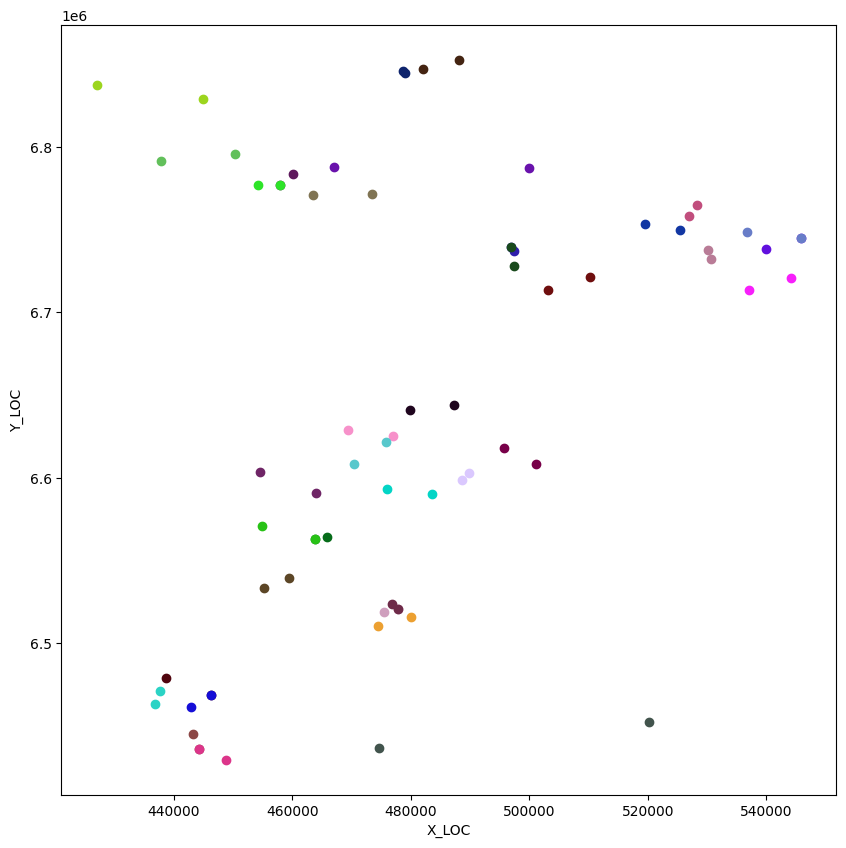

In [4]:
plt.figure(figsize=(10, 10))

for well, well2, _ in closest_well:
    unique_color = np.random.rand(
        3,
    )
    plt.scatter(
        mean_x_y.loc[well]["X_LOC"], mean_x_y.loc[well]["Y_LOC"], color=unique_color
    )
    plt.scatter(
        mean_x_y.loc[well2]["X_LOC"], mean_x_y.loc[well2]["Y_LOC"], color=unique_color
    )
plt.xlabel("X_LOC")
plt.ylabel("Y_LOC")
plt.show()

In [5]:
# the hypothesis is that the two wells are from the lithological distribution
from scipy.stats import ks_2samp

count_different = 0

for well, well2, _ in closest_well:
    # find the lithology of each well
    lithology1 = df[df["WELL"] == well]["LITHOLOGY"]
    lithology2 = df[df["WELL"] == well2]["LITHOLOGY"]
    # find the distribution of lithology
    lithology1_distribution = lithology1.value_counts(normalize=True)
    lithology2_distribution = lithology2.value_counts(normalize=True)
    # find the p-value
    p_value = ks_2samp(lithology1_distribution, lithology2_distribution).pvalue
    if p_value < 0.05:
        print("The two wells have different lithology distribution")
        count_different += 1
print(
    f"Number of wells that have different lithology distribution is {count_different}"
)

Number of wells that have different lithology distribution is 0


This indicates that the lithology of the close well have the same distribution
